In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense
from ipywidgets import interact_manual

Using TensorFlow backend.


In [3]:
#download data
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
#資料的筆數
# print ('x_train_image:', x_train_image.shape) #train資料有60k，28x28
# print ('y_train_label:', y_train_label.shape) #train資料有60k答案
# print ('x_test_image:', x_test_image.shape) #test資料有10k，28x28
# print ('y_test_label:', y_test_label.shape)#test資料有10k答案
# print('x_train:', x_Train.shape)
# print('x_test:', x_Test.shape)

In [5]:
x_Train = x_train_image.reshape(60000,784).astype('float32') #reshape array形狀，從一排變成 60k row x 784 col
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [6]:
#正規化 255colour
x_Train_normalize = x_Train/255 
x_Test_normalize = x_Test/255

In [7]:
#答案變成binary顯示
y_Train_OneHot = np_utils.to_categorical(y_train_label) 
y_Test_OneHot = np_utils.to_categorical(y_test_label)
#把一個號碼，變成array中0~9的binary code形式

In [8]:
model = Sequential()
model.add(Dense(units=256, #特征 0~255
                input_dim=784, #輸入 28*28=784
                kernel_initializer = 'normal', #初始化neauron 的weight和bias = 常態分佈
                activation='relu')) #激發函數 ->線性，因為是絕對的輸入值

In [9]:
model.add(Dense(units=10, #輸出有10種 0~9
                input_dim=784,
                kernel_initializer = 'normal',
                activation='softmax')) #激發函數 ->避免太過線性（因為推導的，所以圖形要彎曲，不要太過線性）

In [11]:
print(model.summary()) #隱藏層對應的neuron有256個、計算（784input*256characteristics）+256bias、隱藏層對應的輸出層有10個neuron

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
#開始train model
model.compile(loss='categorical_crossentropy', #calculate predict和actual 的差距
              optimizer='adam', metrics=['accuracy']) #優化、評估模型的方法

train_history = model.fit(x=x_Train_normalize, #x is input
                          y=y_Train_OneHot, validation_split=0.2, #y is actual ans 其它是預設參數
                          epochs=10, batch_size=200, verbose=0)

In [34]:
#測試準確率
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 72us/step
accuracy= 0.9786999821662903


In [35]:
#幾乎predict對
prediction = model.predict_classes(x_Test_normalize)
print(prediction)
print(y_test_label)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [36]:
#找出錯誤前兩百筆
for i in range(0,200):
  if prediction[i] != y_test_label[i]:
    print(i, prediction[i], y_test_label[i])

8 6 5
115 9 4


In [37]:
#找出錯誤的資料
def showInfor(images, labels, prediction, idx):
  fig = plt.gcf() 
  fig.set_size_inches(12, 14) 
  num=25
  i=0
  while i < num:
    if labels[idx] != prediction[idx]:
      ax = plt.subplot(5,5, 1+i) # 小圖：size5x5、第1個，第2個，。。。按順序初始化第i圖
      ax.imshow(images[idx], cmap='binary') #第幾個圖
      title = "label=" + str(labels[idx]) #答案
      title += ",predict=" +str(prediction[idx]) #預測 
      ax. set_title(title,fontsize=10) 
      ax.set_xticks([]) #隱藏xy label
      ax.set_yticks([])
      i+=1
    idx+=1
  plt.show()
# showInfor(x_test_image, y_test_label, prediction, idx=0)

errorListCount={}
errorList={}
def showInfor2(labels, prediction):
  for i in range(len(labels)):
    if(labels[i],prediction[i]) in errorList.keys():
      errorListCount[(labels[i],prediction[i])] +=1
      errorList[(labels[i],prediction[i])].append(i)
    else:
      errorListCount[(labels[i],prediction[i])] =1
      errorList[(labels[i],prediction[i])] = [i]
showInfor2(y_test_label, prediction)
display(errorList[(3,8)])

[5955, 5973, 6023, 6046, 8277, 9944]

In [38]:
def plot_images_labels_prediction(images,labels,prediction,count): 
  fig = plt.gcf() 
  fig.set_size_inches(12, 14) 
  if count>25: count=25 
  idx=0
  if (labels, prediction) in errorList:
    for idx in range(0, count): 
      if len(errorList[(labels, prediction)]) <= idx:
        break
      ax = plt.subplot(5,5, 1+idx) # 小圖：size5x5、第1個，第2個，。。。按順序初始化第i圖
      ax.imshow(images[errorList[(labels,prediction)][idx]], cmap='binary') #第幾個圖
      title = "id=" + str(errorList[(labels,prediction)][idx]) #答案
      title += ",label=" + str(labels) #答案
      title += ",predict=" +str(prediction) #預測 
      ax. set_title(title,fontsize=10) 
      ax.set_xticks([]) #隱藏xy label
      ax.set_yticks([])
      idx+=1
  plt.show()

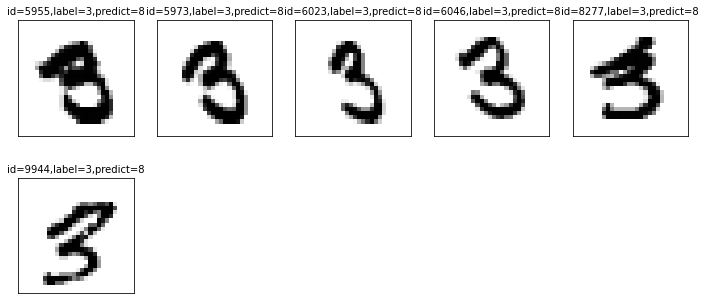

In [39]:
plot_images_labels_prediction(x_test_image, 3,8,10)

In [42]:
def find(actual,prediction,count):
  plot_images_labels_prediction(x_test_image, actual,prediction,count)

interact_manual(find, actual=(0,9), prediction=(0,9), count=(1,25))

interactive(children=(IntSlider(value=4, description='actual', max=9), IntSlider(value=4, description='predict…

<function __main__.find>

In [ ]:
#x_train_image[0]